In [80]:
%run "../../../common/0_notebooks_base_setup.py"   

C:\Users\Charl\OneDrive\Desktop\Data Science\00 Digital-House\clase_04\dsad_2021\common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles para resolver los ejercicios de esta práctica.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [81]:
path='../Data/sales_data_sample_excercise.csv'
data = np.genfromtxt(path, delimiter = '\t', dtype = int, skip_header=1)
data

array([[10107,  2871,     2,  2003,    -1,    -1],
       [10121,  2765,     5,  2003,    -1,    -1],
       [10134,  3884,     7,  2003,    -1,    -1],
       ...,
       [10386,  5417,     3,  2005,    -1,    -1],
       [10397,  2116,     3,  2005,    -1,    -1],
       [10414,  3079,     5,  2005,    -1,    -1]])

In [82]:
path='../Data/sales_data_sample_excercise.csv'
data = np.genfromtxt(path, delimiter = '\t', skip_header=1)
data

array([[1.01070e+04, 2.87100e+03, 2.00000e+00, 2.00300e+03,         nan,
                nan],
       [1.01210e+04, 2.76590e+03, 5.00000e+00, 2.00300e+03,         nan,
                nan],
       [1.01340e+04, 3.88434e+03, 7.00000e+00, 2.00300e+03,         nan,
                nan],
       ...,
       [1.03860e+04, 5.41757e+03, 3.00000e+00, 2.00500e+03,         nan,
                nan],
       [1.03970e+04, 2.11616e+03, 3.00000e+00, 2.00500e+03,         nan,
                nan],
       [1.04140e+04, 3.07944e+03, 5.00000e+00, 2.00500e+03,         nan,
                nan]])

In [83]:
import numpy as np
path='../Data/sales_data_sample_excercise.csv'
data = np.genfromtxt(path, delimiter = '\t', dtype = str, skip_header=1)
data

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

## Ejercicio 2

La función `distribution_plotter` grafica los datos que recibe como parámetro en una instancia de numpy array

Graficar los precios de ventas en tres países. ¿Qué pueden decir respecto a sus distribuciones?

Comparar las distribuciones con la de los precios de ventas sin distinguir por paises

In [84]:
import seaborn as sns

def distribution_plotter(data, label, bin_width=500):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

In [85]:
sales=data[:,1].astype(float)
sales

array([2871.  , 2765.9 , 3884.34, ..., 5417.57, 2116.16, 3079.44])

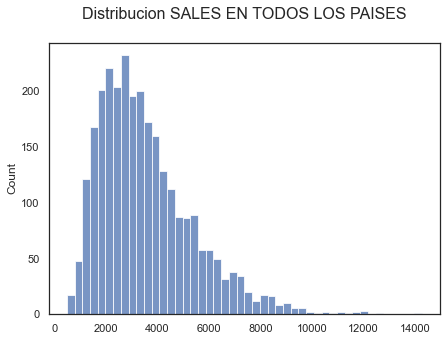

In [86]:
distribution_plotter(sales, 'SALES EN TODOS LOS PAISES', bin_width=300)

In [87]:
#Escojo Australia, Suiza y USA

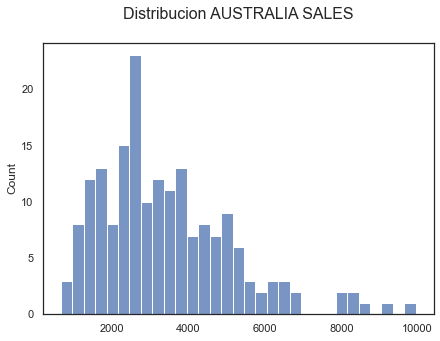

In [88]:
australia_sales = [datos[1].astype(float) for datos in data if np.any(datos == 'Australia')]
distribution_plotter(australia_sales, 'AUSTRALIA SALES', bin_width=300)

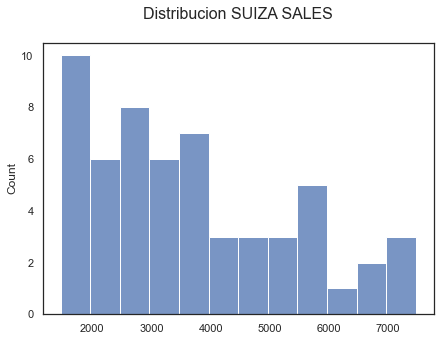

In [99]:
suiza_sales = [datos[1].astype(float) for datos in data if np.any(datos == 'Sweden')]
distribution_plotter(suiza_sales, 'SUIZA SALES', bin_width=500)

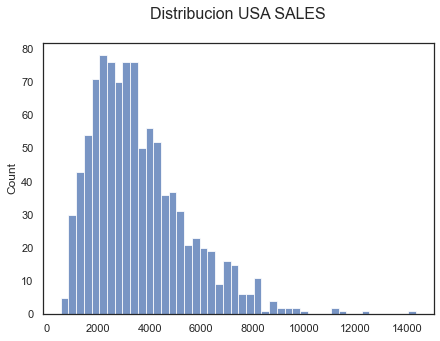

In [90]:
usa_sales = [datos[1].astype(float) for datos in data if np.any(datos == 'USA')]
distribution_plotter(usa_sales, 'USA SALES', bin_width=300)

In [ ]:
Parece una distribucion normal, con un sesgo hacia la izquierda, con lo cual,  moda < mediana < media

## Ejercicio 3
Para los tres países del punto anterior, calcular con dos decimales
* Media
* Mediana
* Rango
* Desvío estandard

Repetir para todos los datos de ventas sin distinguir por país.

¿Qué conclusiones pueden sacar respecto a la información que brinda cada una de estas medidas en este caso particular?

In [91]:
print('Los valores de Australia son:\n' )
print('Media de precios :', np.mean(australia_sales).round(2))
print('La mitad de los precios son menores o iguales a : ',np.median(australia_sales).round(2))
print('El rango de precios es :',(np.max(australia_sales)-np.min(australia_sales)).round(2))
print('El desvio respecto a la media es de : ',np.std(australia_sales))

Los valores de Australia son:

Media de precios : 3408.77
La mitad de los precios son menores o iguales a :  3070.4
El rango de precios es : 9121.68
El desvio respecto a la media es de :  1749.4096278511977


In [92]:
print('Los valores de Suiza son:\n' )
print('Media de precios : ',np.mean(suiza_sales).round(2))
print('La mitad de los precios son menores o iguales a : ',np.median(suiza_sales).round(2))
print('El rango de precios es :',(np.max(suiza_sales)-np.min(suiza_sales)).round(2))
print('El desvio respecto a la media es de : ',np.std(suiza_sales))

Los valores de Suiza son:

Media de precios :  3684.46
La mitad de los precios son menores o iguales a :  3256.96
El rango de precios es : 5741.63
El desvio respecto a la media es de :  1666.0223770295304


In [93]:
print('Los valores de USA son:\n' )
print('Media de precios : ',np.mean(usa_sales).round(2))
print('La mitad de los precios son menores o iguales a : ',np.median(usa_sales).round(2))
print('El rango de precios es :',(np.max(usa_sales)-np.min(usa_sales)).round(2))
print('El desvio respecto a la media es de : ',np.std(usa_sales))

Los valores de USA son:

Media de precios :  3613.53
La mitad de los precios son menores o iguales a :  3236.06
El rango de precios es : 13541.66
El desvio respecto a la media es de :  1879.9971929724536


In [94]:
print('Los valores totales de ventas son:\n' )
print('Media de precios : ',np.mean(sales).round(2))
print('La mitad de los precios son menores o iguales a : ',np.median(sales).round(2))
print('El rango de precios es :',(np.max(sales)-np.min(sales)).round(2))
print('El desvio respecto a la media es de : ',np.std(sales))

Los valores totales de ventas son:

Media de precios :  3553.89
La mitad de los precios son menores o iguales a :  3184.8
El rango de precios es : 13600.67
El desvio respecto a la media es de :  1841.5388520655404
